In [1]:
pip install tensorflow keras matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from random import choice


dataset

In [3]:
tf.config.run_functions_eagerly(True)

In [4]:
import os

# Kaggle's dataset paths
base_dir = '/kaggle/input/brain-tumor-classification-mri'

# List files to verify
print(os.listdir(base_dir))


['Training', 'Testing']


In [5]:
# Define paths to your 'Training' and 'Testing' folders
base_dir = '/kaggle/input/brain-tumor-classification-mri'  # Update with your dataset path
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Check available classes (subfolders for different types of brain tumors)
print(f"Training Classes: {os.listdir(train_dir)}")
print(f"Testing Classes: {os.listdir(test_dir)}")


Training Classes: ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
Testing Classes: ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


 Visualize Images Before Preprocessing:

In [6]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img
from random import choice

In [7]:
# Define paths to your 'Training' folders for each class
no_tumor_train_dir = os.path.join(train_dir, 'no_tumor')
pituitary_train_dir = os.path.join(train_dir, 'pituitary_tumor')
meningioma_train_dir = os.path.join(train_dir, 'meningioma_tumor')
glioma_train_dir = os.path.join(train_dir, 'glioma_tumor')

# List image files from each directory
no_tumor_images = os.listdir(no_tumor_train_dir)
pituitary_images = os.listdir(pituitary_train_dir)
meningioma_images = os.listdir(meningioma_train_dir)
glioma_images = os.listdir(glioma_train_dir)


Random 'No Tumor' Image:


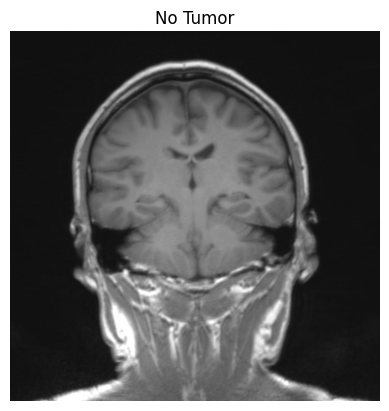

Random 'Pituitary Tumor' Image:


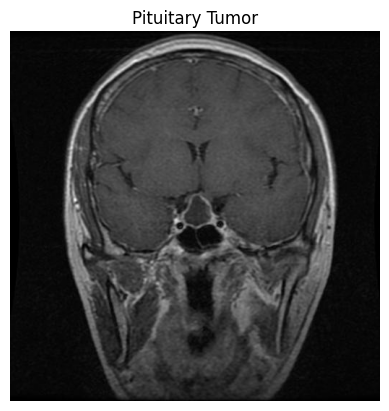

Random 'Meningioma Tumor' Image:


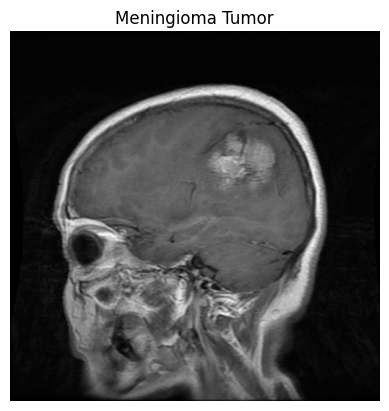

Random 'Glioma Tumor' Image:


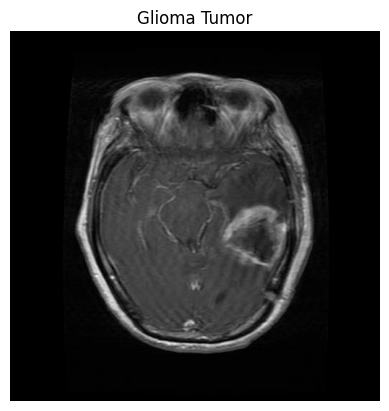

In [8]:
# Function to display images
def display_image(image_path, title):
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Hide the axes for clarity
    plt.show()

# Display one random image from each class
random_no_tumor_img = choice(no_tumor_images)
random_pituitary_img = choice(pituitary_images)
random_meningioma_img = choice(meningioma_images)
random_glioma_img = choice(glioma_images)

print("Random 'No Tumor' Image:")
display_image(os.path.join(no_tumor_train_dir, random_no_tumor_img), "No Tumor")

print("Random 'Pituitary Tumor' Image:")
display_image(os.path.join(pituitary_train_dir, random_pituitary_img), "Pituitary Tumor")

print("Random 'Meningioma Tumor' Image:")
display_image(os.path.join(meningioma_train_dir, random_meningioma_img), "Meningioma Tumor")

print("Random 'Glioma Tumor' Image:")
display_image(os.path.join(glioma_train_dir, random_glioma_img), "Glioma Tumor")


 Data Preprocessing and Augmentation


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
img_width, img_height = 80, 80

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=90,  # Random rotations
    width_shift_range=0.1,  # Shift images horizontally by 10%
    height_shift_range=0.1,  # Shift images vertically by 10%
    horizontal_flip=True,  # Flip images horizontally
    validation_split=0.1  # Reserve 10% of the data for validation
)

# Training Data Generator
train_generator = datagen.flow_from_directory(
    train_dir,  # Path to training data
    target_size=(img_width, img_height),  # Resize all images to 80x80
    batch_size=16,  # Number of images per batch
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Use 90% for training
)

# Validation Data Generator
validation_generator = datagen.flow_from_directory(
    train_dir,  # Same path but for validation data
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='categorical',
    subset='validation'  # Use 10% for validation
)


Found 2585 images belonging to 4 classes.
Found 285 images belonging to 4 classes.


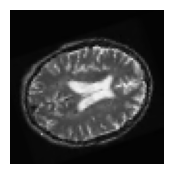

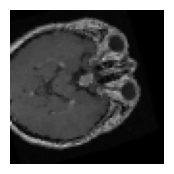

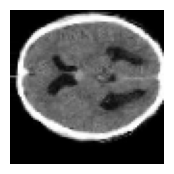

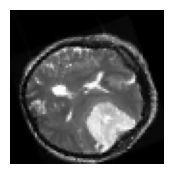

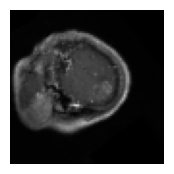

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
x_batch, y_batch = next(train_generator)

# Plot 5 randomly augmented images from the batch
for i in range(5):
    plt.figure(figsize=(2, 2))  # Set figure size
    plt.imshow(x_batch[i])  # Display image
    plt.axis('off')  # Hide axes
    plt.show()  # Show the image


1. Build and Compile the Model


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# Model Initialization
model = Sequential()

# Input Layer
model.add(Input(shape=(80, 80, 3)))  # The input shape matches your image dimensions

# First Convolution Block
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Second Convolution Block
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Third Convolution Block
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Fourth Convolution Block
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes


In [12]:
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Print the model summary to verify the structure
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 79, 79, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 79, 79, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 78, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 78, 78, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 38, 38, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 17, 17, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 17, 17, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 512)      │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,814,852 (26.00 MB)

 Trainable params: 6,811,012 (25.98 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,  # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=50,  # Number of epochs
    callbacks=[early_stop]  # Early stopping to avoid overfitting
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 57s 323ms/step - accuracy: 0.4292 - loss: 5.3475 - val_accuracy: 0.2877 - val_loss: 5.0498
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 303ms/step - accuracy: 0.6137 - loss: 1.0369 - val_accuracy: 0.2947 - val_loss: 8.3000
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.6769 - loss: 0.8290 - val_accuracy: 0.3368 - val_loss: 3.2068
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 304ms/step - accuracy: 0.6978 - loss: 0.7321 - val_accuracy: 0.4877 - val_loss: 1.3161
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 307ms/step - accuracy: 0.7404 - loss: 0.6523 - val_accuracy: 0.5263 - val_loss: 1.4422
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 304ms/step - accuracy: 0.7317 - loss: 0.6813 - val_accuracy: 0.5228 - val_loss: 1.4794
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 304ms/step - accuracy: 0.7548 - loss: 0.6203 - val_accuracy: 0.4737 - val_loss: 1.8890
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 304ms/step - accuracy: 0.7698 - loss: 0.6239 - val

In [14]:
# Save the model after training
model.save('brain_tumor_cnn_model.h5')  # Save the model in HDF5 format

# Optionally, print a message to confirm the model has been saved
print("Model saved as 'brain_tumor_cnn_model.h5'")


Model saved as 'brain_tumor_cnn_model.h5'


 Evaluate the Model


In [15]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7844 - loss: 0.6757
Validation Loss: 0.7268610000610352
Validation Accuracy: 0.7824561595916748


Visualize Training Results

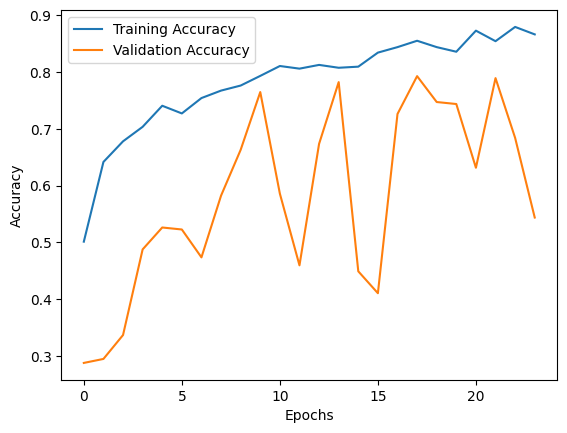

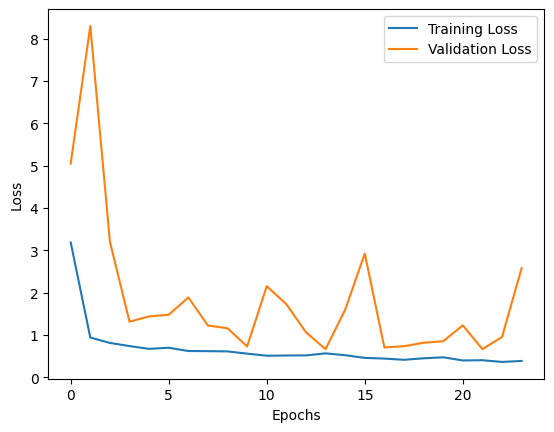

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
